In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('data/aviation_cleaned.csv')

/Users/samalainabayeva/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (18,19,20,21) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### Need to convert injury columns to ints...

In [3]:
df['total_fatal_injuries'] = df['total_fatal_injuries'].map(lambda x: float(x) if x != "Unknown" else x)

In [4]:
df['total_serious_injuries'] = df['total_serious_injuries'].map(lambda x: float(x) if x != "Unknown" else x)

In [5]:
df['total_minor_injuries'] =df['total_minor_injuries'].map(lambda x: float(x) if x != "Unknown" else x)

In [6]:
hypothetical_data = df['total_minor_injuries'].replace("Unknown", 0)

In [7]:
hypothetical_data_ser = df['total_serious_injuries'].replace("Unknown", 0)

In [8]:
hypothetical_data.describe()

count    88889.000000
mean         0.309127
std          2.083715
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        380.000000
Name: total_minor_injuries, dtype: float64

In [9]:
hypothetical_data_ser.describe()

count    88889.000000
mean         0.240491
std          1.434614
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        161.000000
Name: total_serious_injuries, dtype: float64

In [10]:
hypothetical_data_fat = df['total_fatal_injuries'].replace("Unknown", 0)

In [11]:
hypothetical_data_fat.describe()

count    88889.000000
mean         0.564761
std          5.126649
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        349.000000
Name: total_fatal_injuries, dtype: float64

In [12]:
df["survivable_injuries"] = (df['total_minor_injuries'].replace("Unknown", 0)) + (df["total_serious_injuries"].replace("Unknown", 0))

In [13]:
df['survivable_injuries'].value_counts()

0.0      63365
1.0      15270
2.0       6903
3.0       1580
4.0        901
         ...  
172.0        1
57.0         1
46.0         1
80.0         1
64.0         1
Name: survivable_injuries, Length: 74, dtype: int64

In [14]:
# sns.scatterplot(x='total_fatal_injuries', y='survivable_injuries', data = df)

In [15]:
boeing_inc = df[(df['make'] == "BOEING") & (df['investigation_type'] == 'Incident')]

In [16]:
pd.options.display.max_columns = 50
df.head()

,event_id,investigation_type,accident_number,event_date,location,country,airport_code,airport_name,injury_severity,aircraft_damage,aircraft_category,make,model,amateur_built,number_of_engines,engine_type,purpose_of_flight,air_carrier,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,report_status,survivable_injuries
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Unknown,Unknown,Fatal(2),Destroyed,Unknown,Stinson,108-3,No,1.0,Reciprocating,Personal,Unknown,2,0,0,0.0,Unknown,Cruise,Probable Cause,0.0
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Unknown,Unknown,Fatal(4),Destroyed,Unknown,Piper,PA24-180,No,1.0,Reciprocating,Personal,Unknown,4,0,0,0.0,Unknown,Unknown,Probable Cause,0.0
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Unknown,Unknown,Fatal(3),Destroyed,Unknown,Cessna,172M,No,1.0,Reciprocating,Personal,Unknown,3,Unknown,Unknown,Unknown,IMC,Cruise,Probable Cause,0.0
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Unknown,Unknown,Fatal(2),Destroyed,Unknown,Rockwell,112,No,1.0,Reciprocating,Personal,Unknown,2,0,0,0.0,IMC,Cruise,Probable Cause,0.0
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Unknown,Unknown,Fatal(1),Destroyed,Unknown,Cessna,501,No,Unknown,Unknown,Personal,Unknown,1,2,Unknown,0.0,VMC,Approach,Probable Cause,2.0


In [17]:
df[df["investigation_type"] == "Accident"]['make'].value_counts()

Cessna             21973
Piper              11885
CESSNA              4820
Beech               4170
PIPER               2799
                   ...  
Lorello                1
Betchan                1
Frennance              1
Syreini                1
ANDERSON JOHN H        1
Name: make, Length: 8170, dtype: int64

### Need to standardize the case of letters in this column

In [24]:
df['make'] = df['make'].str.lower()

### Uppercase Country Column

In [25]:
df['country'] = df['country'].str.upper()

### Gain access to the specific year of date

In [26]:
df['event_date'].dtype  # object
df["year_of_event"] = df['event_date'].map(lambda x: int(x[:4]))

### 1948 - 2022, median is from 1998 - overall span of 74 years

In [27]:
df['year_of_event'].describe()

count    88889.000000
mean      1999.206662
std         11.888226
min       1948.000000
25%       1989.000000
50%       1998.000000
75%       2009.000000
max       2022.000000
Name: year_of_event, dtype: float64

In [28]:
top_ten_accident_craft = df[df["investigation_type"] == "Accident"]['make'].value_counts(normalize=False)[:10]
top_ten_accident_craft

cessna      26793
piper       14684
beech        5177
bell         2662
boeing       1362
mooney       1311
robinson     1219
grumman      1158
bellanca     1040
hughes        925
Name: make, dtype: int64

In [29]:
list(top_ten_accident_craft.index)

['cessna',
 'piper',
 'beech',
 'bell',
 'boeing',
 'mooney',
 'robinson',
 'grumman',
 'bellanca',
 'hughes']

In [30]:
top_ten_incident_craft = df[df["investigation_type"] == "Incident"]['make'].value_counts(normalize=False)[:10]

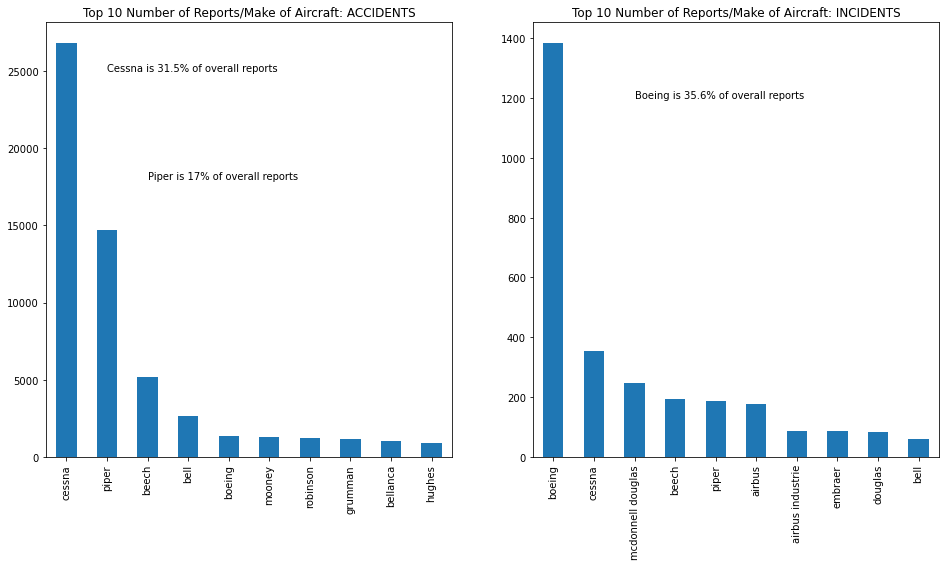

In [31]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 8))
ax1.set_title("Top 10 Number of Reports/Make of Aircraft: ACCIDENTS")
ax2.set_title("Top 10 Number of Reports/Make of Aircraft: INCIDENTS")
ax1.annotate(xy=(1, 25000), text="Cessna is 31.5% of overall reports")
ax1.annotate("Piper is 17% of overall reports", xy=(2, 18000))
ax2.annotate("Boeing is 35.6% of overall reports", xy=(2, 1200))
top_ten_accident_craft.plot(kind='bar', ax=ax1)
top_ten_incident_craft.plot(kind='bar', ax=ax2);

In [33]:
top_ten_accident_craft_normalized = df[df["investigation_type"] == "Accident"]['make'].value_counts(normalize=True)[:10]

In [35]:
top_ten_incident_craft_normalized = df[df["investigation_type"] == "Incident"]['make'].value_counts(normalize=True)[:10]

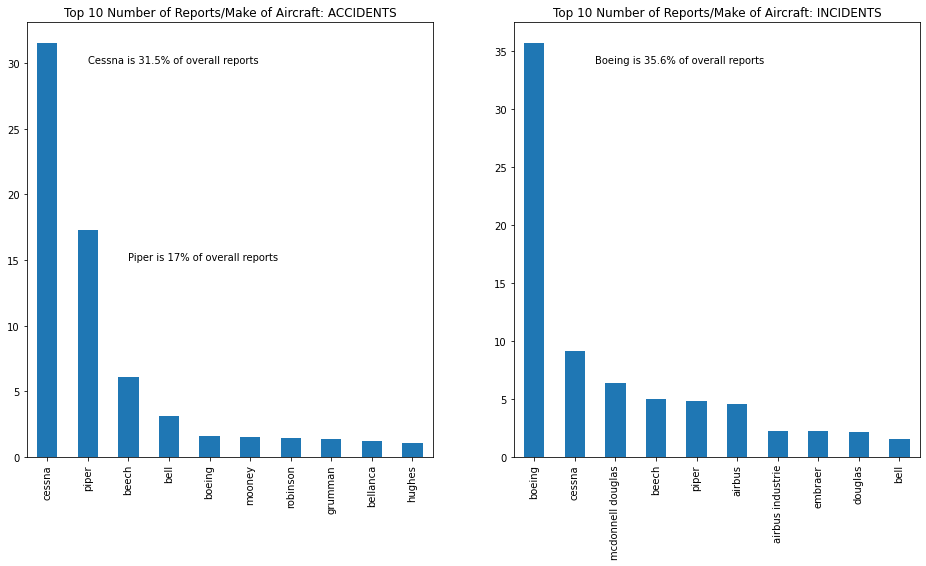

In [36]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 8))
ax1.set_title("Top 10 Number of Reports/Make of Aircraft: ACCIDENTS")
ax2.set_title("Top 10 Number of Reports/Make of Aircraft: INCIDENTS")
ax1.annotate(xy=(1, 30), text="Cessna is 31.5% of overall reports")
ax1.annotate("Piper is 17% of overall reports", xy=(2, 15))
ax2.annotate("Boeing is 35.6% of overall reports", xy=(1.5, 34))
(top_ten_accident_craft_normalized * 100).plot(kind='bar', ax=ax1)
(top_ten_incident_craft_normalized * 100).plot(kind='bar', ax=ax2);

### ACCIDENTS: Severe outcome not caused by instrumental failure

### INCIDENTS: Moderate outcome typically caused by instrumental failure

In [37]:
top_ten_accident_craft_normalized = df[df["investigation_type"] == "Accident"]['make'].value_counts(normalize=True)[:10]

In [38]:
top_ten_accident_craft

cessna      26793
piper       14684
beech        5177
bell         2662
boeing       1362
mooney       1311
robinson     1219
grumman      1158
bellanca     1040
hughes        925
Name: make, dtype: int64

In [39]:
top_ten_incident_craft_normalized = df[df["investigation_type"] == "Incident"]['make'].value_counts(normalize=True)[:10]

In [40]:
print(top_ten_incident_craft, top_ten_incident_craft_normalized)

boeing               1383
cessna                356
mcdonnell douglas     247
beech                 195
piper                 186
airbus                179
airbus industrie       88
embraer                88
douglas                85
bell                   60
Name: make, dtype: int64 boeing               0.356995
cessna               0.091895
mcdonnell douglas    0.063758
beech                0.050336
piper                0.048012
airbus               0.046205
airbus industrie     0.022716
embraer              0.022716
douglas              0.021941
bell                 0.015488
Name: make, dtype: float64


In [41]:
print(top_ten_accident_craft, top_ten_accident_craft_normalized)

cessna      26793
piper       14684
beech        5177
bell         2662
boeing       1362
mooney       1311
robinson     1219
grumman      1158
bellanca     1040
hughes        925
Name: make, dtype: int64 cessna      0.315156
piper       0.172722
beech       0.060895
bell        0.031312
boeing      0.016021
mooney      0.015421
robinson    0.014339
grumman     0.013621
bellanca    0.012233
hughes      0.010880
Name: make, dtype: float64


### BOEING ANALYSIS

In [44]:
boeing_inc = df[(df['make'] == "boeing") & (df['investigation_type'] == 'Incident')]

In [45]:
boeing_inc.head(2)

,event_id,investigation_type,accident_number,event_date,location,country,airport_code,airport_name,injury_severity,aircraft_damage,aircraft_category,make,model,amateur_built,number_of_engines,engine_type,purpose_of_flight,air_carrier,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,report_status,survivable_injuries,year_of_event
320,20020917X02336,Incident,LAX82IA075,1982-02-15,"ONTARIO, CA",UNITED STATES,ONT,ONTARIO INTERNATIONAL,Incident,Minor,Airplane,boeing,B737-2H4,No,2.0,Turbo Jet,Unknown,Aircal,0,0,0,119.0,IMC,Approach,Probable Cause,0.0,1982
351,20020917X02151,Incident,FTW82IA062,1982-02-19,"HARLINGEN, TX",UNITED STATES,HRL,HARLINGEN IND.AIR PARK,Incident,Unknown,Airplane,boeing,B-727-200,No,3.0,Turbo Jet,Unknown,Mexicana Airlines,Unknown,Unknown,Unknown,83.0,IMC,Landing,Probable Cause,0.0,1982


### engine types:

In [46]:
engine = boeing_inc['engine_type'].value_counts()

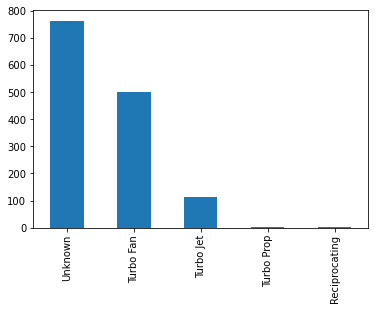

In [47]:
engine.plot(kind="bar");

### number of engines

In [48]:
boe_eng_num = boeing_inc['number_of_engines'].value_counts()

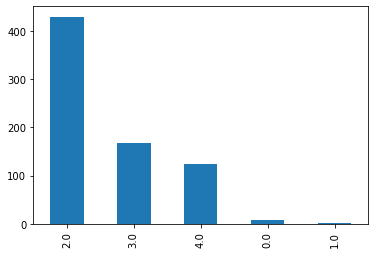

In [49]:
boe_eng_num.drop("Unknown").plot(kind='bar');

### Broad-phase info

In [50]:
boe_phase = boeing_inc['broad_phase_of_flight'].value_counts()
boe_phase['Unknown']

911

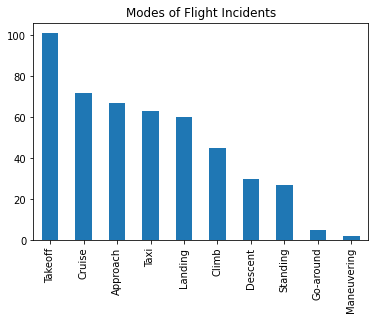

In [51]:
boe_phase.drop("Unknown").plot(kind='bar', title=("Modes of Flight Incidents"));

### Different models of Boeing

In [52]:
boeing_inc['model'].dtype

dtype('O')

In [55]:
boeing_inc['model'].value_counts(normalize=True)

737            0.255965
777            0.052061
747            0.046999
767            0.028200
757            0.026753
                 ...   
B744           0.000723
727-31H        0.000723
767 - 204ER    0.000723
737-790        0.000723
727-2Q8        0.000723
Name: model, Length: 347, dtype: float64

In [56]:
boeing_sts_model = boeing_inc[boeing_inc['model'].str.startswith("737") == True]

In [57]:
boeing_sts_model['model'].value_counts()

737          354
737-800       22
737-300       22
737-200       18
737-400       15
            ... 
737-932ER      1
737-3TO        1
737 500        1
737-4Q8        1
737 - 4Q8      1
Name: model, Length: 80, dtype: int64

### A lot of detail around model 737